# Image Processing

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = './data/'

## < Access pixel values and modify >

(256, 256, 3)


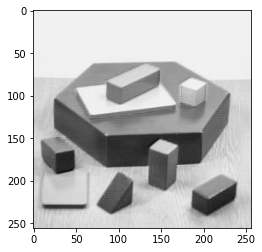

In [3]:
block_img = cv2.imread(data_path + 'blox.jpg', 1)
block_img = cv2.cvtColor(block_img, cv2.COLOR_BGR2RGB)
print(block_img.shape)
plt.imshow(block_img)

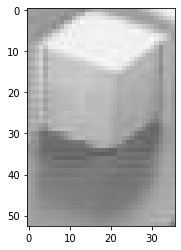

In [4]:
plt.imshow(block_img[79:132, 170:206,:]) #이 부분의 이미지가 크롭됨

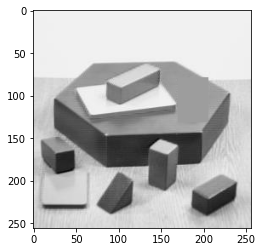

In [5]:
block_img[79:132, 170:206,:] = block_img[79,170,:] #삭제
plt.imshow(block_img)

(467, 709, 3)


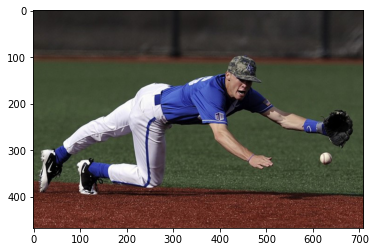

In [6]:
baseball_img = cv2.imread(data_path+'baseball_player.jpg')
baseball_img = cv2.cvtColor(baseball_img, cv2.COLOR_BGR2RGB)
print(baseball_img.shape)
plt.imshow(baseball_img)

In [7]:
#to do : Make it look like two balls
# ball [305:332, 614:641]
baseball_img=cv.2
[305:500, 614:641]=baseball_img[305:332, 614:641,:]
plt.imshow(baseball_img)

ValueError: could not broadcast input array from shape (27,27,3) into shape (162,27,3)

## < Image Histogram >

(600, 868)


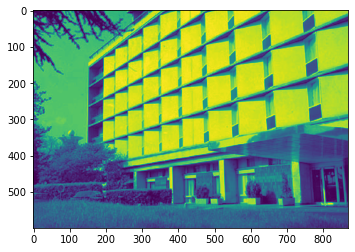

In [8]:
building_img = cv2.imread(data_path+"building.jpg", 0)
#building_img = cv2.cvtColor(building_img, cv2.COLOR_BGR2RGB)
print(building_img.shape)
height = building_img.shape[0]
width = building_img.shape[1]
plt.imshow(building_img)

#### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
 
images : Source image

channels : If input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.

mask : If you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.

histSize : This represents our BIN count.

ranges : This is our RANGE. Normally, it is [0,256].

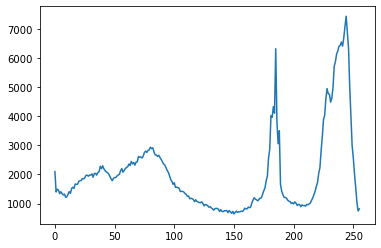

In [9]:
calchist1 = cv2.calcHist([building_img], [0], None, [256], [0,256])
plt.plot(calchist1)

#### Histogram Equalization

#### cv2.equalizeHist(src)

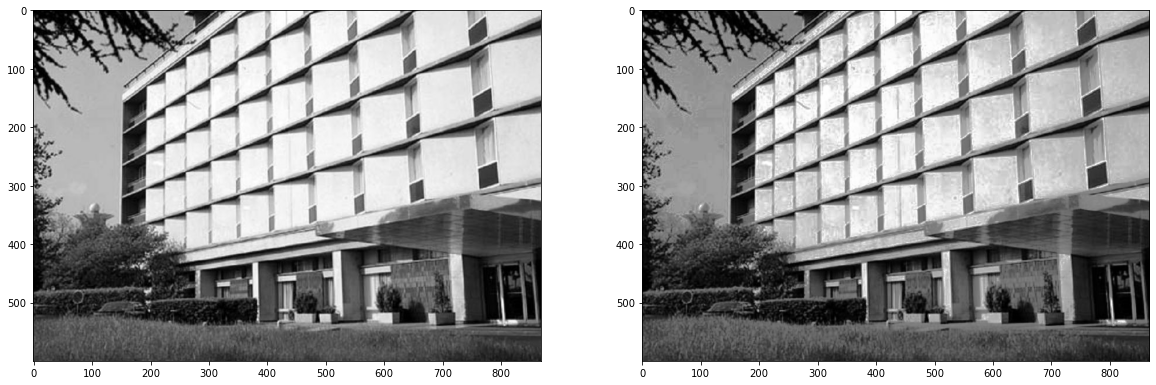

In [10]:
building_img = cv2.imread(data_path+"building.jpg", 0)
eq_img1 = cv2.equalizeHist(building_img)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
building_img = cv2.cvtColor(building_img, cv2.COLOR_BGR2RGB)
eq_img1 = cv2.cvtColor(eq_img1, cv2.COLOR_BGR2RGB)
ax1.imshow(building_img)
ax2.imshow(eq_img1)

#### cv2.createCLAHE(clipLimit, tileGridSize)

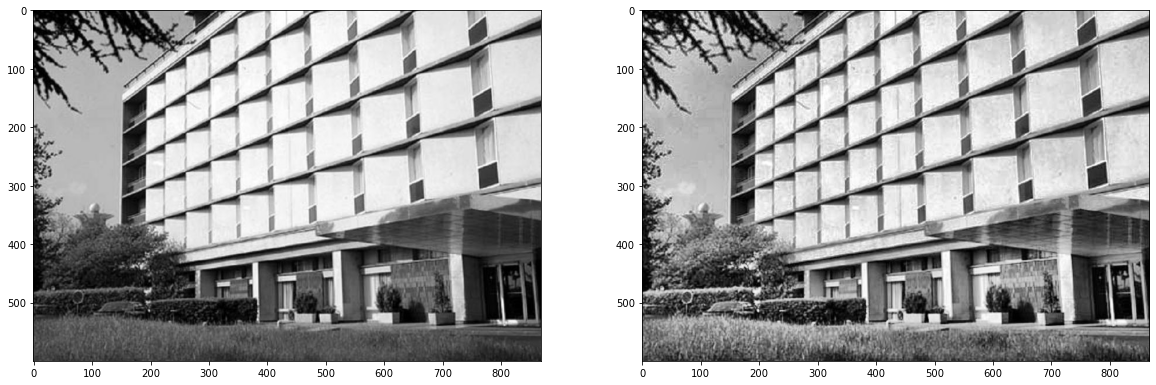

In [11]:
building_img = cv2.imread(data_path+"building.jpg", 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_img2 = clahe.apply(building_img)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
building_img = cv2.cvtColor(building_img, cv2.COLOR_BGR2RGB)
eq_img2 = cv2.cvtColor(eq_img2, cv2.COLOR_BGR2RGB)
ax1.imshow(building_img)
ax2.imshow(eq_img2)

## < Image Thresholding >

#### cv2.threshold(src, thresh, maxval, type) → retval, dst 
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).
 
- thresholding type

cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

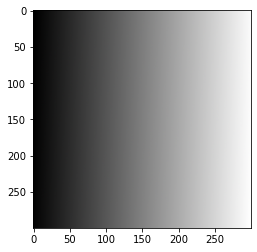

In [12]:
gradient_img = cv2.imread(data_path + "gradient.png", 1)
plt.imshow(gradient_img)

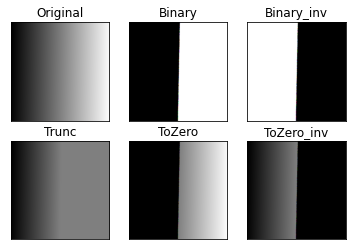

In [13]:
ret, thresh1 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_BINARY) #검정색은 검정색두고, 하얀색으로?
ret, thresh2 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original", "Binary", "Binary_inv", "Trunc", "ToZero", "ToZero_inv"]
imgs = [gradient_img, thresh1, thresh2, thresh3 ,thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

#### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

- Adaptive Method

cv2.ADAPTIVE_THRESH_MEAN_C

cv2.ADAPTIVE_THRESH_GAUSSIAN_C

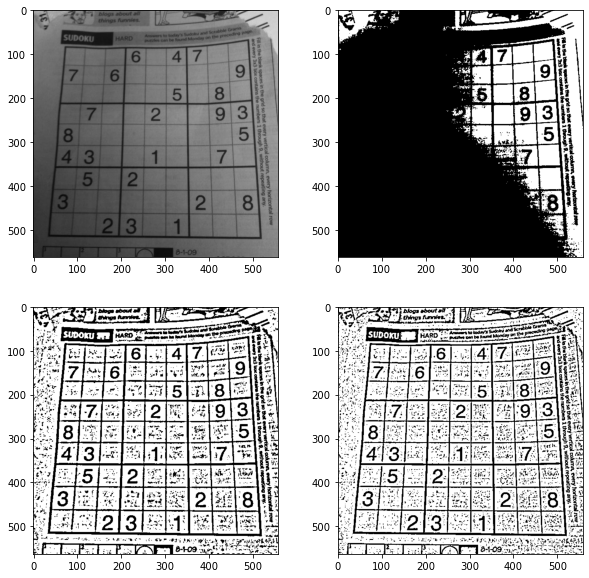

In [14]:
sudoku_img = cv2.imread(data_path + 'sudoku.png',0)

ret, th1 = cv2.threshold(sudoku_img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(sudoku_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)

th3 = cv2.adaptiveThreshold(sudoku_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']
images = [sudoku_img,th1,th2,th3]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
sudoku_img = cv2.cvtColor(sudoku_img, cv2.COLOR_BGR2RGB)
th1 = cv2.cvtColor(th1, cv2.COLOR_BGR2RGB)
th2 = cv2.cvtColor(th2, cv2.COLOR_BGR2RGB)
th3 = cv2.cvtColor(th3, cv2.COLOR_BGR2RGB)
ax1.imshow(sudoku_img)
ax2.imshow(th1)
ax3.imshow(th2)
ax4.imshow(th3)

#### otsu binarization

128.0 111.0


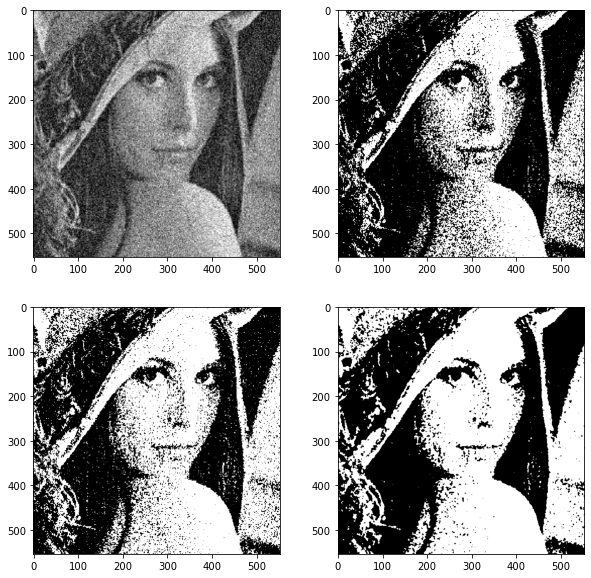

In [15]:
lena_img_c = cv2.imread(data_path+"lena_noisy.jpg", 1)

lena_img = cv2.imread(data_path+"lena_noisy.jpg", 0)

ret1, th = cv2.threshold(lena_img, 128, 255, cv2.THRESH_BINARY)

ret2, otsu1 = cv2.threshold(lena_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(lena_img,(5,5),0)
ret, otsu2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret1, ret2)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))

lena_img_c = cv2.cvtColor(lena_img_c, cv2.COLOR_BGR2RGB) 
th = cv2.cvtColor(th, cv2.COLOR_BGR2RGB)
otsu1 = cv2.cvtColor(otsu1, cv2.COLOR_BGR2RGB)
otsu2 = cv2.cvtColor(otsu2, cv2.COLOR_BGR2RGB)

ax1.imshow(lena_img_c)
ax2.imshow(th)
ax3.imshow(otsu1)
ax4.imshow(otsu2)

# Image Filtering 

#### cv2.filter2D(img, ddepth, kernel)

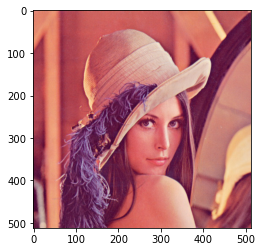

In [16]:
img = cv2.imread(data_path + "lena.jpg")
gray_img = cv2.imread(data_path + "lena.jpg", 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [17]:
k = np.ones((3,3), np.uint8)
k = k/(3*3)
k

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

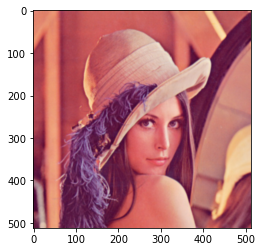

In [18]:
blur_dst = cv2.filter2D(img, -1, k)
plt.imshow(blur_dst) 

In [19]:
def blur_func(img, f_size):
    new_h, new_w = img.shape[:2]
    new_h -= (f_size//2)*2
    new_w -= (f_size//2)*2
    new_img = np.zeros((new_h,new_w,3), np.uint8)
    
    k = np.ones((f_size,f_size, 3), np.uint8)
    k = k/(f_size*f_size)
    
    for i in range(new_w):
        for j in range(new_h):
            new_value = img[i:i+f_size,j:j+f_size,:] * k
            new_value = new_value.sum(axis=0).sum(axis=0)
            new_img[i,j] = new_value.astype('uint8')
            
    plt.imshow(new_img)

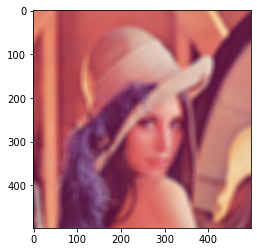

In [20]:
blur_func(img, 15)

#### motion blur

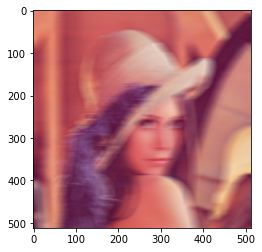

In [21]:
size=30
motion_blur = np.zeros((size, size))
motion_blur[int((size-1)/2), :] = np.ones(size)
motion_blur = motion_blur / size

dst = cv2.filter2D(img, -1, motion_blur)
plt.imshow(dst)

#### Sharpening

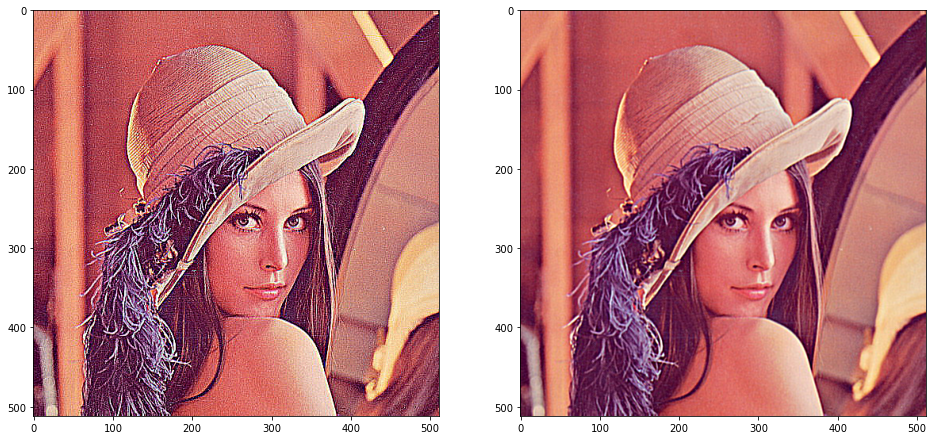

In [22]:
sharpening_1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpening_2 = np.array([[-1, -1, -1, -1, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, 2, 9, 2, -1],
                         [-1, 2, 2, 2, -1],
                         [-1, -1, -1, -1, -1]]) / 9.0

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (16,8))
dst1 = cv2.filter2D(img, -1, sharpening_1)
ax1.imshow(dst1)

dst2 = cv2.filter2D(img, -1, sharpening_2)
ax2.imshow(dst2)

## < Blurring >

#### cv2.Blur(img, ksize)
#### cv2.GaussianBlur(img, ksize, sigma)
#### cv2.medianBlur(img, ksize)
#### cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

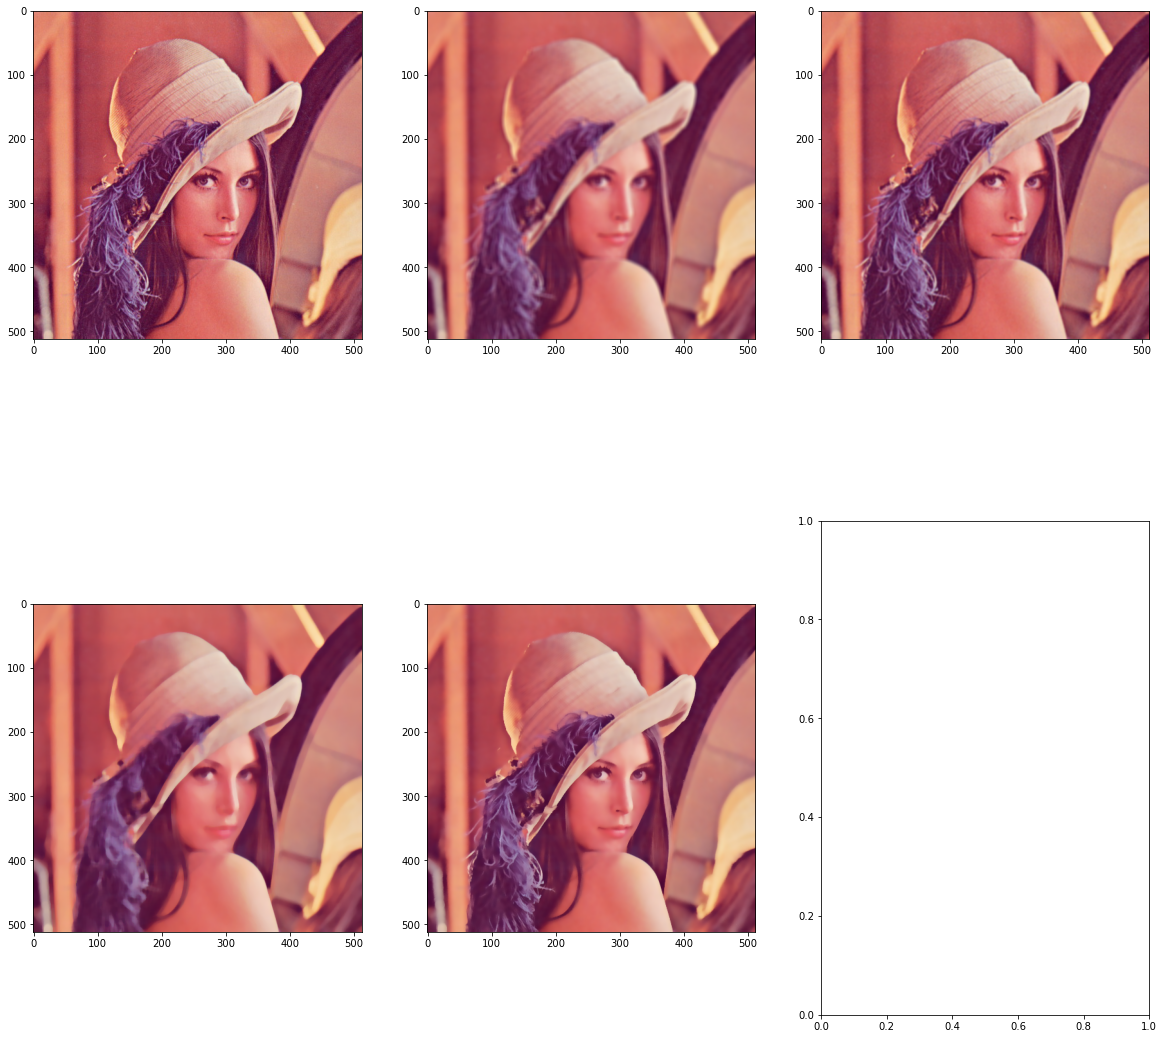

In [23]:
dst1 = cv2.blur(img,(7,7))
dst2 = cv2.GaussianBlur(img,(5,5),0)
dst3 = cv2.medianBlur(img,9)
dst4 = cv2.bilateralFilter(img,9,75,75)

images = [img,dst1,dst2,dst3,dst4]

fig, ((ax1, ax2, ax3), (ax4,ax5, _)) = plt.subplots(nrows=2, ncols=3, figsize =(20,20))
axs = [ax1, ax2, ax3, ax4, ax5]

for i in range(5):
    axs[i].imshow(images[i])

plt.show()